In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

## Basic preprocessing

In [5]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df["rating"].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [7]:
df["budget"].value_counts()

20000000.0    233
30000000.0    229
25000000.0    211
10000000.0    208
15000000.0    204
             ... 
34200000.0      1
30000.0         1
29750000.0      1
5250000.0       1
58750.0         1
Name: budget, Length: 413, dtype: int64

In [8]:
df["gross"].value_counts()

14000000.0     3
5000000.0      2
10000000.0     2
12000000.0     2
626057.0       2
              ..
327333559.0    1
56631572.0     1
187436818.0    1
1007583.0      1
13266.0        1
Name: gross, Length: 7472, dtype: int64

In [9]:
df.dropna(subset=["rating","gross","company","runtime"],inplace=True)

In [10]:
df.shape

(7415, 15)

In [11]:
df.isna().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           0
country        0
budget      1994
gross          0
company        0
runtime        0
dtype: int64

In [12]:
df["budget"].fillna(value=df["budget"].mean(),inplace=True)

In [13]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      3
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [16]:
df.shape

(7412, 15)

## EDA

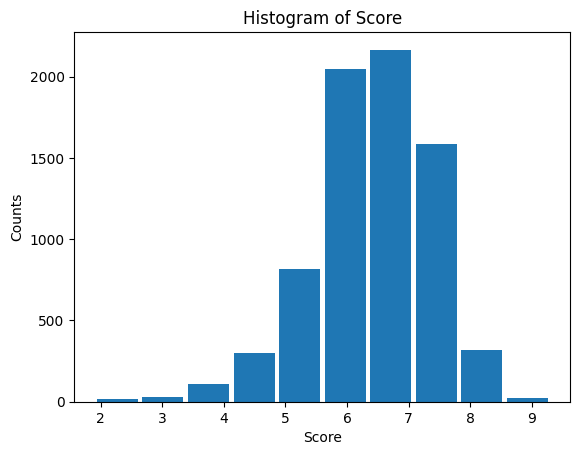

In [17]:
plt.hist(df["score"],rwidth=0.9)
plt.title("Histogram of Score")
plt.xlabel("Score")
plt.ylabel("Counts")
plt.show()

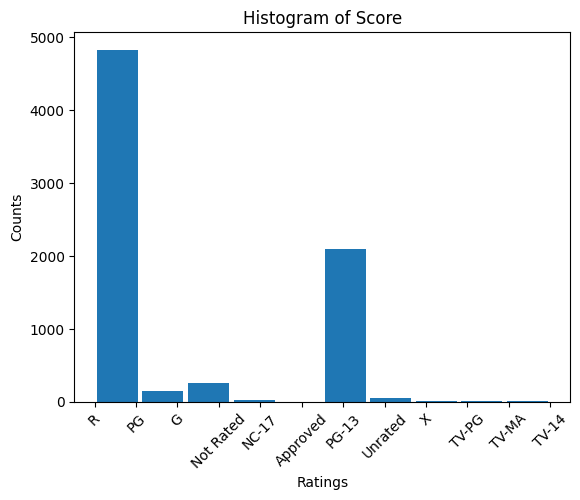

In [18]:
plt.hist(df["rating"],rwidth=0.9)
plt.title("Histogram of Score")
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

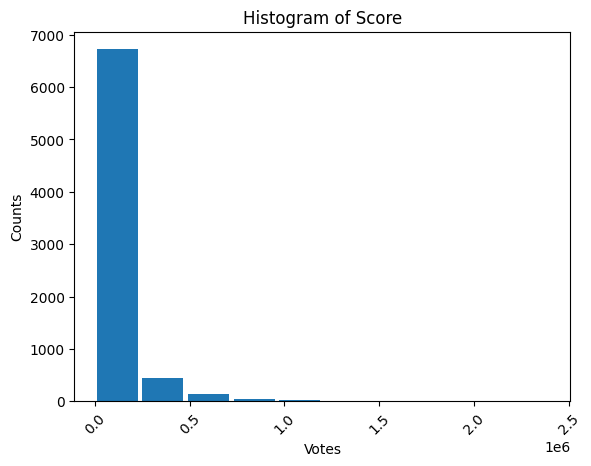

In [19]:
plt.hist(df["votes"],rwidth=0.9)
plt.title("Histogram of Score")
plt.xlabel("Votes")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

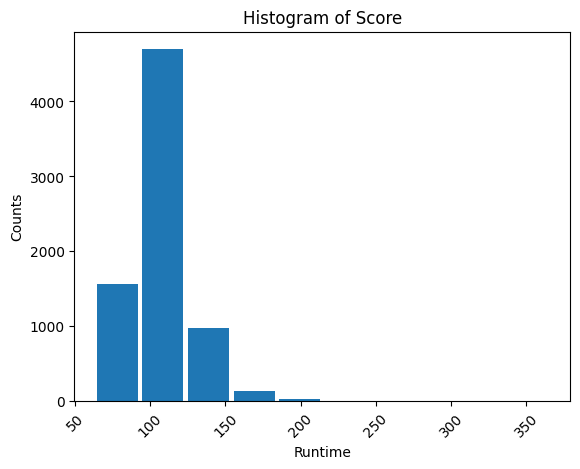

In [20]:
plt.hist(df["runtime"],rwidth=0.9)
plt.title("Histogram of Score")
plt.xticks(rotation=45)
plt.xlabel("Runtime")
plt.ylabel("Counts")
plt.show()

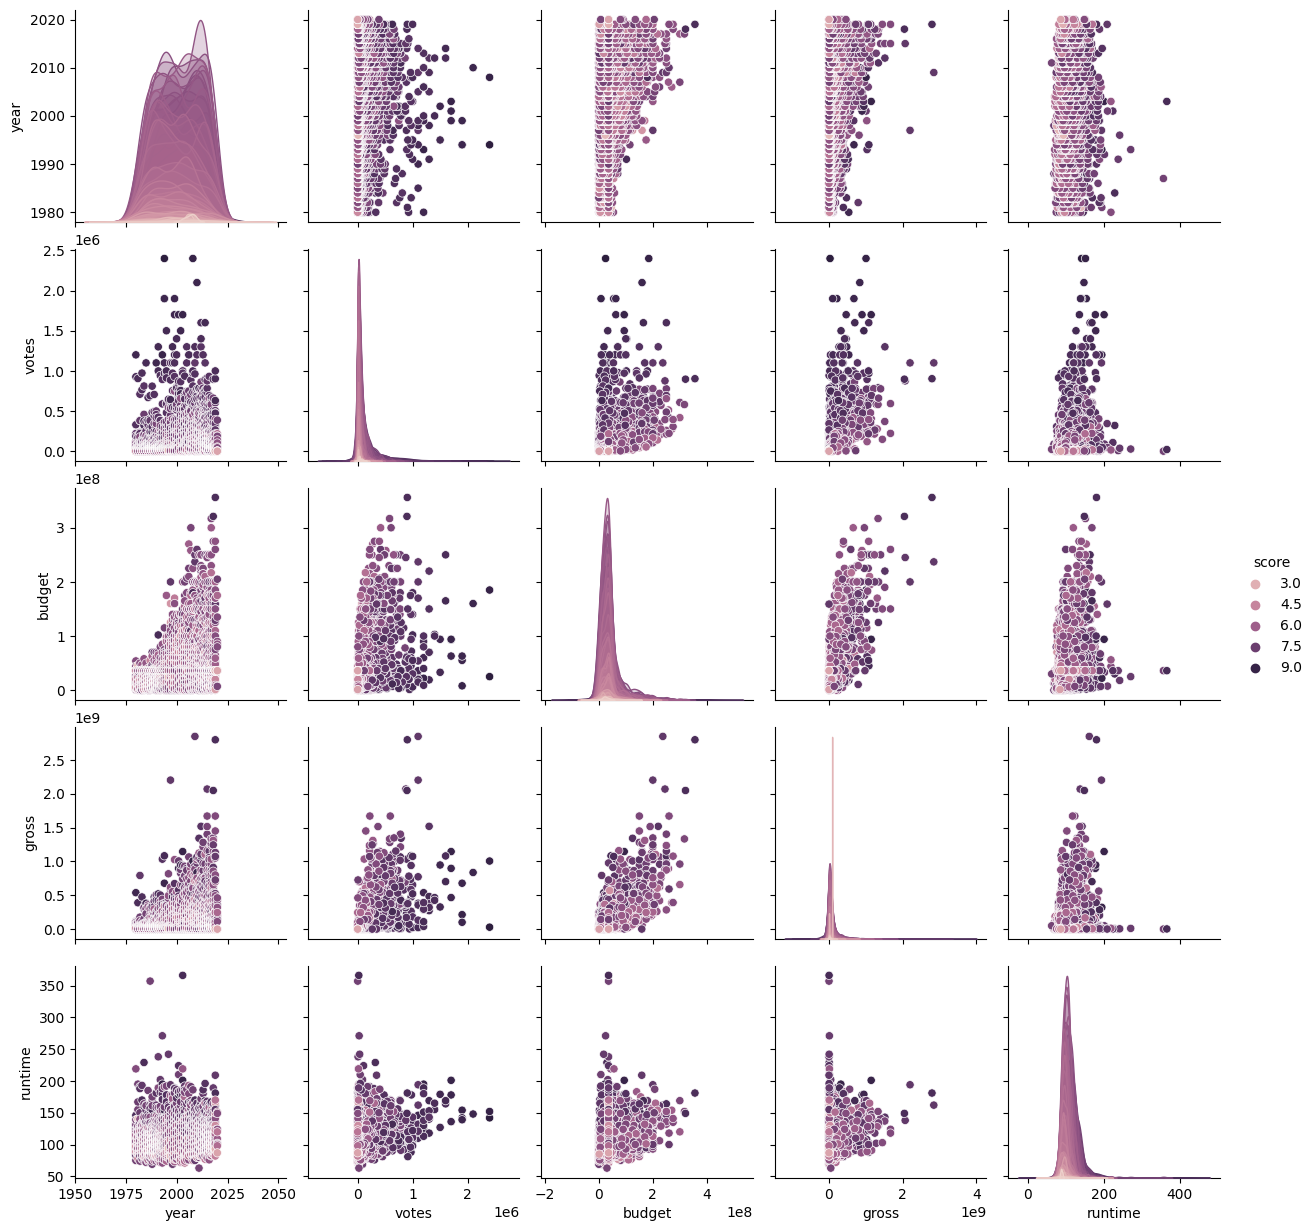

In [21]:
sns.pairplot(df,hue="score")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_30388\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


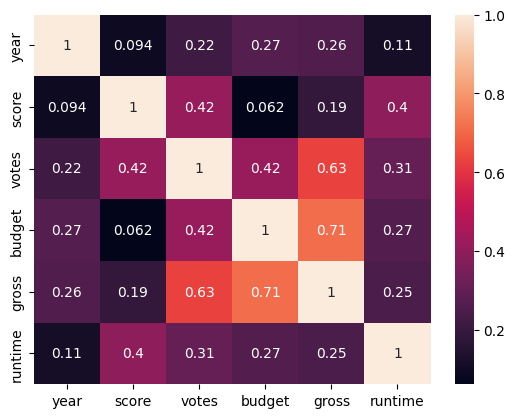

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
# Dropping Released column from the datset
df.drop(columns=["released"],axis=1,inplace=True)

In [25]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [26]:
df.iloc[:,[0]]

,name
0,The Shining
1,The Blue Lagoon
2,Star Wars: Episode V - The Empire Strikes Back
3,Airplane!
4,Caddyshack
...,...
7651,The Call of the Wild
7652,The Eight Hundred
7653,The Quarry
7656,Tulsa


In [27]:
df.shape

(7412, 14)

In [28]:
X = df.drop(columns=["score"])

In [36]:
y = df["score"]

In [98]:
# Splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Creating transformers and pipeline

In [83]:
trf1 = ColumnTransformer([
    ("ohe_col", OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,1,2,6,7,8,9,12])
],remainder="passthrough")

In [84]:
trf2 = ColumnTransformer([
    ("scale", StandardScaler(), slice(0,14))
])

In [85]:
model = LinearRegression()

In [86]:
pipeline = Pipeline(steps=[("trf1",trf1),("trf2",trf2),("model",model)])

In [87]:
from sklearn import set_config
set_config(display='diagram')

## Training the dataset

In [88]:
pipeline.fit(X_train,y_train)

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 6, 7, 8, 9, 12])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 14, None))])),
                ('model', LinearRegression())])

In [89]:
y_pred = pipeline.predict(X_test)

## Evaluation

In [93]:
mae = mean_absolute_error(y_test,y_pred)

In [94]:
mse = mean_squared_error(y_test,y_pred)

In [97]:
print("The Mean Squared error is",mae)
print("The Mean Absolute error is",mse)

The Mean Squared error is 0.746345525422241
The Mean Absolute error is 0.9317381329103723
